Chargement des données :



In [2]:
# Chargement du dataset
file_path = r'D:\BDBI\stage\Tickets.csv'
tickets_data = pd.read_csv(file_path)

Exploration initiale des données :

In [3]:
# Afficher les premières lignes du dataset
print("Les premières lignes du dataset :")
print(tickets_data.head())


Les premières lignes du dataset :
           ID                                             Title  \
0  2373084132                            minor fix for bfloat16   
1  2373010351                 Fix dump of bfloat16 torch tensor   
2  2372930879   Datasetbuilder Local Download FileNotFoundError   
3  2372887585  IterableDataset: Unsupported ScalarType BFloat16   
4  2372124589                                      Remove tasks   

              User   State            Created At            Updated At  
0          lhoestq  closed  2024-06-25T16:10:04Z  2024-06-25T16:16:11Z  
1          lhoestq  closed  2024-06-25T15:38:09Z  2024-06-25T16:10:16Z  
2         purefall    open  2024-06-25T15:02:34Z  2024-06-25T15:21:19Z  
3        stoical07  closed  2024-06-25T14:43:26Z  2024-06-25T16:04:00Z  
4  albertvillanova    open  2024-06-25T09:06:16Z  2024-06-25T13:49:44Z  


In [4]:

# Vérifier les types de données et les valeurs manquantes
print("\nInformations sur les types de données :")
print(tickets_data.info())


Informations sur les types de données :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6862 entries, 0 to 6861
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          6862 non-null   int64 
 1   Title       6862 non-null   object
 2   User        6862 non-null   object
 3   State       6862 non-null   object
 4   Created At  6862 non-null   object
 5   Updated At  6862 non-null   object
dtypes: int64(1), object(5)
memory usage: 321.8+ KB
None


Nettoyage des Données :


In [5]:
# Gestion des données manquantes
# Exemple d'imputation pour les données numériques (remplacer par la moyenne)
# et pour les données catégorielles (remplacer par une valeur spécifique)
# Remplacement des valeurs manquantes dans une colonne numérique (par exemple, ID ici)
tickets_data['ID'].fillna(tickets_data['ID'].mean(), inplace=True)



C:\Users\HP\AppData\Local\Temp\ipykernel_17864\89855700.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tickets_data['ID'].fillna(tickets_data['ID'].mean(), inplace=True)


In [6]:
# Remplacement des valeurs manquantes dans une colonne catégorielle (par exemple, State ici)
# en remplaçant par la valeur la plus fréquente
state_mode = tickets_data['State'].mode()[0]
tickets_data['State'].fillna(state_mode, inplace=True)


C:\Users\HP\AppData\Local\Temp\ipykernel_17864\2013051576.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tickets_data['State'].fillna(state_mode, inplace=True)


In [8]:
import numpy as np


In [9]:

# Identification et correction des erreurs de données (par exemple, valeurs aberrantes)
# Exemple de vérification et de correction des valeurs aberrantes dans une colonne numérique
mean = tickets_data['ID'].mean()
std_dev = tickets_data['ID'].std()
lower_limit = mean - 3 * std_dev
upper_limit = mean + 3 * std_dev

tickets_data['ID'] = np.where(tickets_data['ID'] < lower_limit, mean, tickets_data['ID'])
tickets_data['ID'] = np.where(tickets_data['ID'] > upper_limit, mean, tickets_data['ID'])



In [10]:
# Affichage des premières lignes après nettoyage
print("Premières lignes après nettoyage :")
print(tickets_data.head())

Premières lignes après nettoyage :
             ID                                             Title  \
0  2.373084e+09                            minor fix for bfloat16   
1  2.373010e+09                 Fix dump of bfloat16 torch tensor   
2  2.372931e+09   Datasetbuilder Local Download FileNotFoundError   
3  2.372888e+09  IterableDataset: Unsupported ScalarType BFloat16   
4  2.372125e+09                                      Remove tasks   

              User   State            Created At            Updated At  
0          lhoestq  closed  2024-06-25T16:10:04Z  2024-06-25T16:16:11Z  
1          lhoestq  closed  2024-06-25T15:38:09Z  2024-06-25T16:10:16Z  
2         purefall    open  2024-06-25T15:02:34Z  2024-06-25T15:21:19Z  
3        stoical07  closed  2024-06-25T14:43:26Z  2024-06-25T16:04:00Z  
4  albertvillanova    open  2024-06-25T09:06:16Z  2024-06-25T13:49:44Z  


Normalisation des Données :


In [11]:
# Normalisation Min-Max pour la colonne 'ID'
min_id = tickets_data['ID'].min()
max_id = tickets_data['ID'].max()
tickets_data['ID_normalized'] = (tickets_data['ID'] - min_id) / (max_id - min_id)

In [12]:
# Affichage des premières lignes après normalisation
print("Premières lignes après normalisation :")
print(tickets_data.head())

Premières lignes après normalisation :
             ID                                             Title  \
0  2.373084e+09                            minor fix for bfloat16   
1  2.373010e+09                 Fix dump of bfloat16 torch tensor   
2  2.372931e+09   Datasetbuilder Local Download FileNotFoundError   
3  2.372888e+09  IterableDataset: Unsupported ScalarType BFloat16   
4  2.372125e+09                                      Remove tasks   

              User   State            Created At            Updated At  \
0          lhoestq  closed  2024-06-25T16:10:04Z  2024-06-25T16:16:11Z   
1          lhoestq  closed  2024-06-25T15:38:09Z  2024-06-25T16:10:16Z   
2         purefall    open  2024-06-25T15:02:34Z  2024-06-25T15:21:19Z   
3        stoical07  closed  2024-06-25T14:43:26Z  2024-06-25T16:04:00Z   
4  albertvillanova    open  2024-06-25T09:06:16Z  2024-06-25T13:49:44Z   

   ID_normalized  
0       1.000000  
1       0.999958  
2       0.999914  
3       0.999889  
4     

Visualisation des Données :


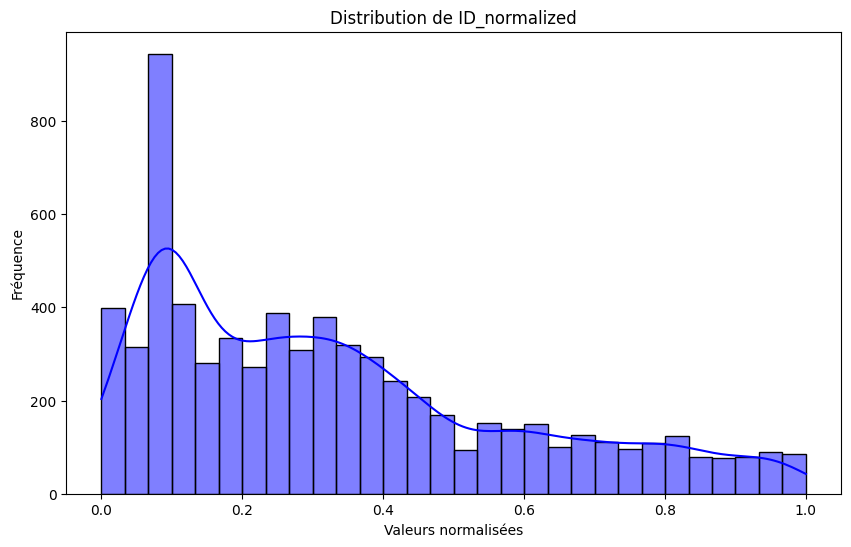

In [13]:
# Visualisation des distributions des variables numériques (par exemple, ID_normalized)
plt.figure(figsize=(10, 6))
sns.histplot(tickets_data['ID_normalized'], bins=30, kde=True, color='blue')
plt.title('Distribution de ID_normalized')
plt.xlabel('Valeurs normalisées')
plt.ylabel('Fréquence')
plt.show()

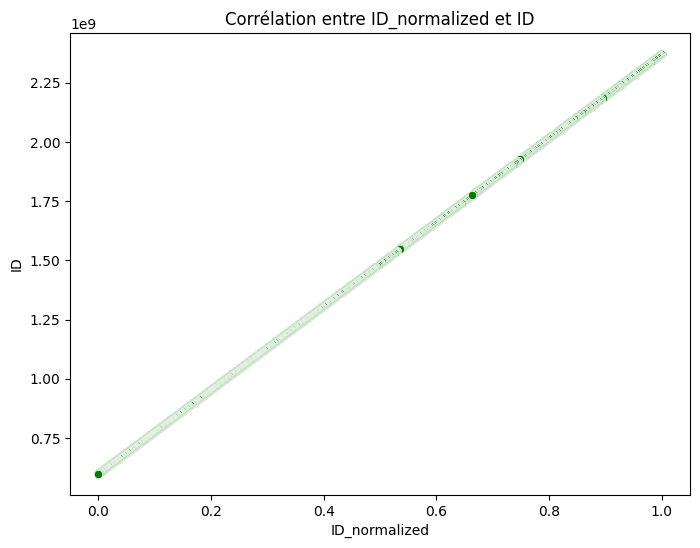

In [15]:
# Visualisation des corrélations entre les variables numériques (par exemple, ID_normalized et ID)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='ID_normalized', y='ID', data=tickets_data, color='green')
plt.title('Corrélation entre ID_normalized et ID')
plt.xlabel('ID_normalized')
plt.ylabel('ID')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_17864\1162609420.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='State', data=tickets_data, palette='pastel')


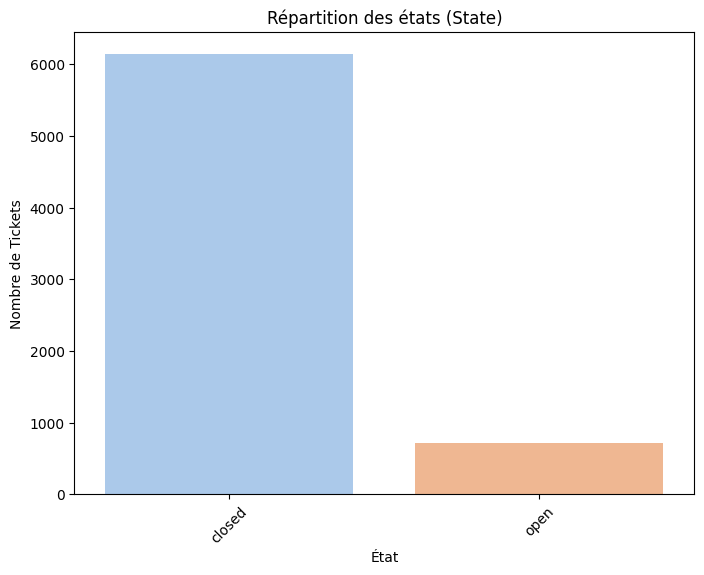

In [16]:
# Visualisation des variables catégorielles (par exemple, State)
plt.figure(figsize=(8, 6))
sns.countplot(x='State', data=tickets_data, palette='pastel')
plt.title('Répartition des états (State)')
plt.xlabel('État')
plt.ylabel('Nombre de Tickets')
plt.xticks(rotation=45)
plt.show()

Analyse Statistique des Données :


In [17]:
# Statistiques descriptives pour les variables numériques
numeric_stats = tickets_data.describe()
print("Statistiques descriptives pour les variables numériques :")
print(numeric_stats)

Statistiques descriptives pour les variables numériques :
                 ID  ID_normalized
count  6.862000e+03    6862.000000
mean   1.191104e+09       0.333580
std    4.573594e+08       0.257867
min    5.994575e+08       0.000000
25%    7.846493e+08       0.104414
50%    1.088551e+09       0.275759
75%    1.447976e+09       0.478409
max    2.373084e+09       1.000000


In [19]:
from scipy import stats 

In [20]:
# Exemple de test de corrélation entre deux variables numériques (par exemple, ID_normalized et une autre variable numérique)
correlation, p_value = stats.pearsonr(tickets_data['ID_normalized'], tickets_data['ID'])
print("\nCorrélation entre ID_normalized et ID :")
print(f"Corrélation : {correlation}")s
print(f"P-value : {p_value}")


Corrélation entre ID_normalized et ID :
Corrélation : 0.9999999999999997
P-value : 0.0
